# Load built-in and ported datasets from TGB
This tutorial shows you how to load built-in datasets


In [1]:
import tgx

### Access TGB datasets
In order to load TGB datasets you should first install the TGB package:

`pip install py-tgb`

Then write name of the dataset in the parantheses:

`tgx.data.tgb("name")`

The dataset names are as follow

`tgbl-wiki`, `tgbl-review`, `tgbl-coin`, `tgbl-comment`, `tgbl-flight`

`tgbn-trade`, `tgbn-genre`, `tgbn-reddit`

In [ ]:
from tgx.io.read_files import read_edgelist
dataset = tgx.data.tgb("tgbl-review")
data = read_edgelist(data=dataset, discretize=True, time_scale=51)

file found, skipping download
Dataset directory is  /home/mila/r/razieh.shirzadkhani/.conda/envs/tg/lib/python3.9/site-packages/tgb/datasets/tgbl_review
loading processed file
Number of loaded edges: 4873540
Number of unique edges:4730223
Available timestamps:  6865
Discretizing data to 51 timestamps...
Descritization Done..!


### Access other datasets

To load datasets from https://proceedings.neurips.cc/paper_files/paper/2022/hash/d49042a5d49818711c401d34172f9900-Abstract-Datasets_and_Benchmarks.html you should write the name of the dataset instead of `datasest_name`:

`tgx.data.dataset_name`

The dataset names are as:

`mooc`, `uci`, `uslegis`, `unvote`, `untrade`, `flight`, `wikipedia`, `reddit`, `lastfm`, `contact`, `canparl`, `socialevo`, `enron`

In [2]:
data_path = '/network/scratch/r/razieh.shirzadkhani/'
dataset = tgx.data.mooc(root=data_path)
data = read_edgelist(data=dataset, discretize=True, time_scale=51)
G = tgx.Graph(data)

Number of loaded edges: 411749
Number of unique edges:178443
Available timestamps:  345600
Discretizing data to 51 timestamps...
Descritization Done..!


### Subsampling graphs

To perform subsmpling graphs you should follow these steps:

1. descritize the data

2. create a graph object of data (G)

3. run `graph_subsampling(G)` by specifying either random selection and number of nodes or providing a list of node ids

4. assign the created graph to the object as `G.subsampled_graph`

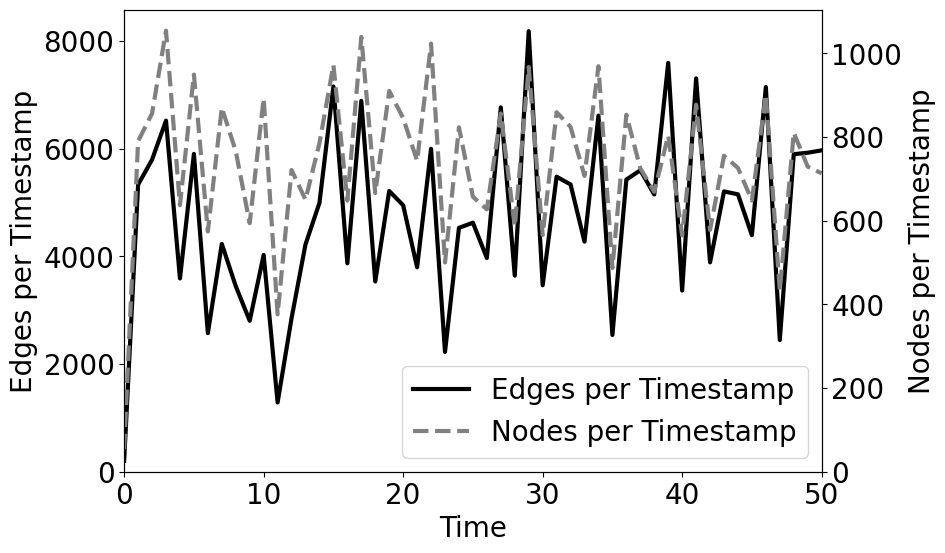

Plotting average degree per timestamp


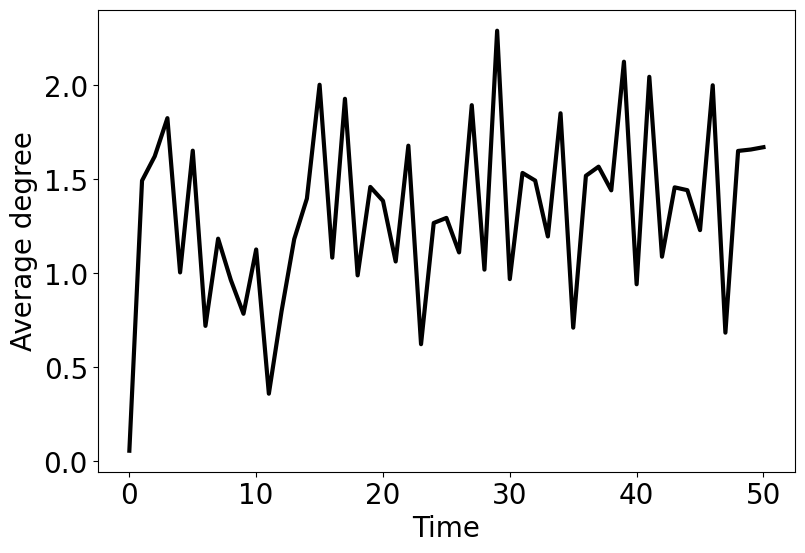

Plotting Done!


In [4]:
tgx.nodes_and_edges_per_ts(G.discrite_graph, network_name=dataset.name)
total_nodes = G.number_of_nodes()
tgx.average_degree_per_ts(G.discrite_graph, total_nodes, network_name=dataset.name)

In [3]:
from tgx.utils.graph_utils import subsampling

G = tgx.Graph(data)
new_edges = subsampling(G, random_selection=True, N=1000)
G.subsampled_graph = G._generate_graph(new_edges)

Generate graph subsample...


### Plot node&edge and average degree per timestamp for subsampled graphs

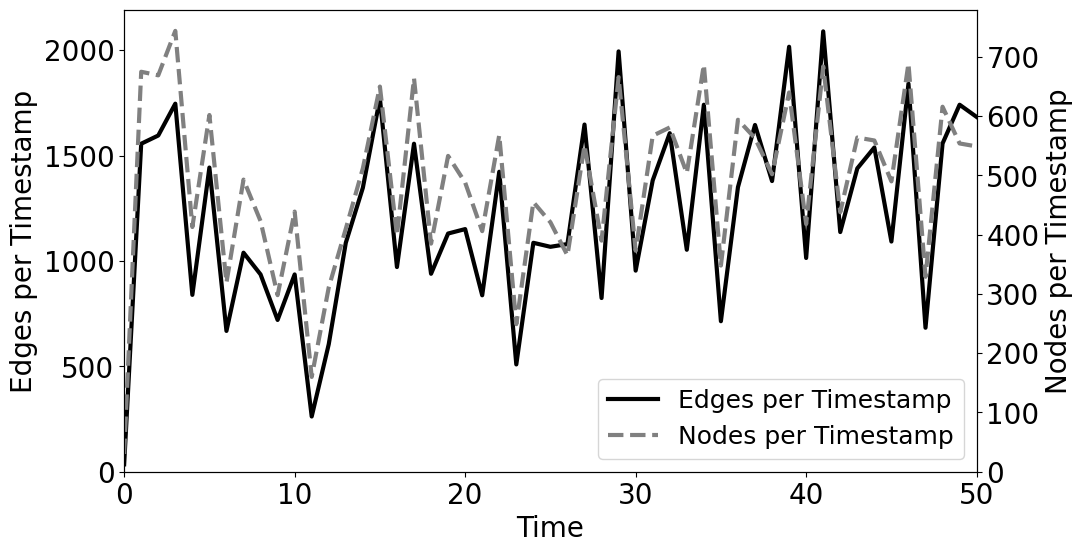

Plotting average degree per timestamp


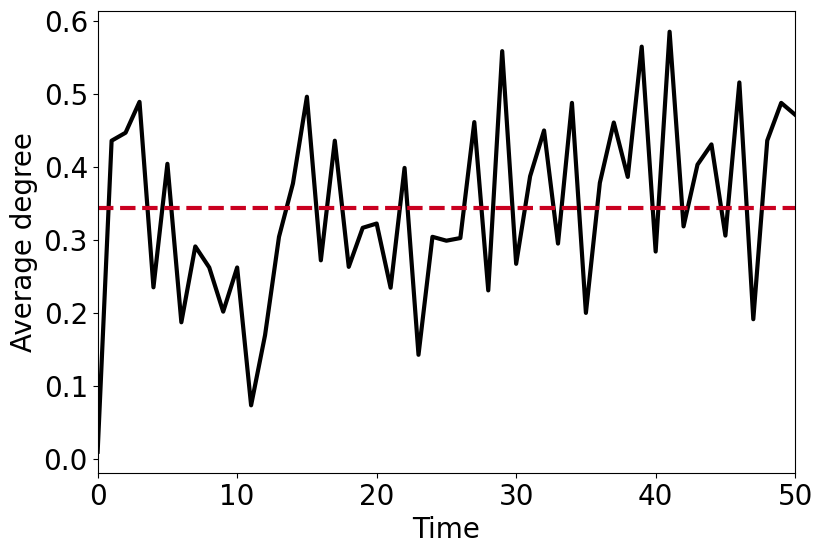

Plotting Done!


In [4]:
plot_path = "./examples/plots/"
tgx.nodes_and_edges_per_ts(G.subsampled_graph, network_name=dataset.name)
tgx.average_degree_per_ts(G.subsampled_graph, G.number_of_nodes(), network_name=dataset.name)

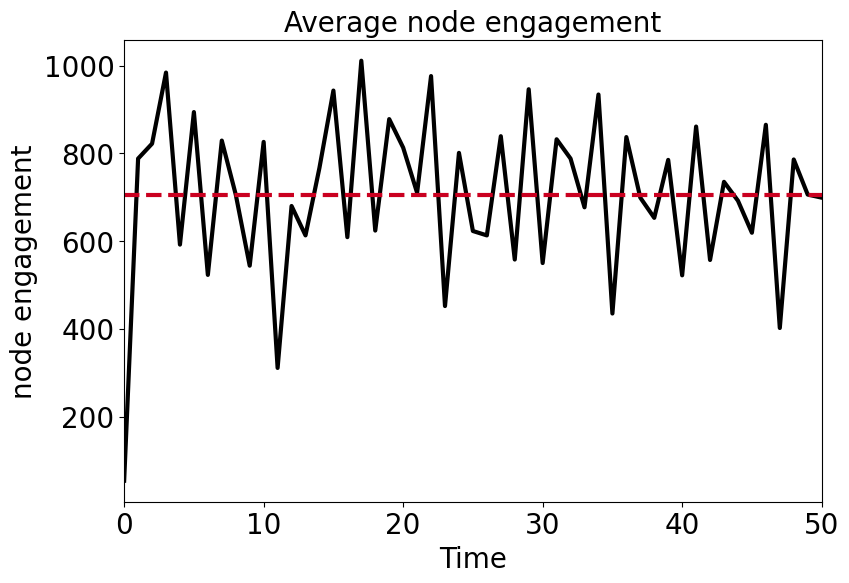

In [3]:
from tgx.utils.graph_stat import get_avg_node_engagement

node_engagement = get_avg_node_engagement(data)
filename = f"{dataset.name}_ave_node_engagement_per_ts"
tgx.utils.plot_for_snapshots(node_engagement, filename, "node engagement", plot_title="Average node engagement")